# TRAINER

# Getting The Data

### Setup IG Session

In [1]:
pip install trading_ig pandas munch tenacity

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys

sys.path.append("./utils/")

In [3]:
from utils.IG import IG

_IG = IG()
config_live = _IG.getLoginConfig('live')

IG - Instantiated


In [4]:
ig_service_live = _IG.getIgService(config_live)
_IG.getIgAccountDetails(ig_service_live)

{'accountType': 'CFD',
 'accountInfo': {'balance': 236.35,
  'deposit': 52.81,
  'profitLoss': -39.0,
  'available': 144.54},
 'currencyIsoCode': 'USD',
 'currencySymbol': '$',
 'currentAccountId': 'QM0EM',
 'lightstreamerEndpoint': 'https://apd.marketdatasystems.com',
 'accounts': [{'accountId': 'QM0EM',
   'accountName': 'CFD Live',
   'preferred': True,
   'accountType': 'CFD'}],
 'clientId': '104831189',
 'timezoneOffset': 8,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

### Get the Historical Data of GBP/USD Mini

In [5]:
TARGET_EPIC = 'CS.D.GBPUSD.MINI.IP'
RESOLUTION = '15Min'
PREVIOUS_MONTHS_COUNT_FROM_TODAY = 4

In [6]:
# Get today's next day date as End Date, and previous X month(s) from today as Start Date

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

end_date = datetime.combine(date.today(), datetime.max.time())
start_date = datetime.combine(date.today() - relativedelta(months=PREVIOUS_MONTHS_COUNT_FROM_TODAY), datetime.min.time())

print(f'''End: {end_date}''')
print(f'''Start: {start_date}''')

End: 2022-05-10 23:59:59.999999
Start: 2022-01-10 00:00:00


In [7]:
LOCAL_READ = False

try:
    history = _IG.getHistoricalPricesByDuration(ig_service_live, {'TARGET_EPIC':TARGET_EPIC, 
                                                                  'RESOLUTION':RESOLUTION, 
                                                                  'start_date':start_date, 
                                                                  'end_date':end_date})
    history['prices']
except Exception as e:
    print(e)
    LOCAL_READ = True

In [8]:
# If API failed, read data from previously saved Excel File

from os import listdir
from os.path import isfile, join
    
def readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH):
    onlyfiles = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]
    onlyfiles.sort(reverse=True)
    for fileName in onlyfiles:
        if TARGET_EPIC in fileName and RESOLUTION in fileName:
            return fileName
        
    return ''

In [9]:
import pandas as pd

DATA_PATH = '../data/'

if LOCAL_READ:
    print(f'''{DATA_PATH}{readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH)}''')
    df_history = pd.read_excel(f'''{DATA_PATH}{readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH)}''',
                               index_col=[0], header=[0,1])
    df_history = df_history.rename(columns={df_history.columns[0][1]:''}, level=1)
else:
    print('Retrieved from API')
    df_history = pd.DataFrame.from_dict(history['prices'])
    df_history = df_history.reset_index()
    
df_history

Retrieved from API


DateTime      bid                                 ask  \
                             Open     High      Low    Close     Open   
0    2022-01-10 04:00:00  1.35714  1.35816  1.35682  1.35719  1.35924   
1    2022-01-10 04:15:00  1.35699  1.35721  1.35691  1.35699  1.35909   
2    2022-01-10 04:30:00  1.35698  1.35719  1.35687  1.35698  1.35908   
3    2022-01-10 04:45:00  1.35700  1.35737  1.35669  1.35687  1.35910   
4    2022-01-10 05:00:00  1.35685  1.35810  1.35660  1.35806  1.35895   
...                  ...      ...      ...      ...      ...      ...   
8296 2022-05-09 23:00:00  1.23053  1.23216  1.23042  1.23145  1.23062   
8297 2022-05-09 23:15:00  1.23144  1.23174  1.23072  1.23090  1.23153   
8298 2022-05-09 23:30:00  1.23093  1.23254  1.23064  1.23228  1.23102   
8299 2022-05-09 23:45:00  1.23227  1.23413  1.23214  1.23336  1.23236   
8300 2022-05-10 00:00:00  1.23333  1.23399  1.23250  1.23362  1.23348   

                                last                        
         High      Low    Close Open High Low Close Volume  
0     1.36003  1.35892  1.35929  NaN  NaN NaN   NaN     58  
1     1.35931  1.35901  1.35909  NaN  NaN NaN   NaN     26  
2     1.35929  1.35897  1.35908  NaN  NaN NaN   NaN     31  
3     1.35947  1.35879  1.35897  NaN  NaN NaN   NaN     78  
4     1.35946  1.35795  1.35916  NaN  NaN NaN   NaN    256  
...       ...      ...      ...  ...  ...  ..   ...    ...  
8296  1.23225  1.23051  1.23154  NaN  NaN NaN   NaN   2625  
8297  1.23186  1.23083  1.23099  NaN  NaN NaN   NaN   1955  
8298  1.23263  1.23073  1.23237  NaN  NaN NaN   NaN   2862  
8299  1.23422  1.23223  1.23345  NaN  NaN NaN   NaN   2735  
8300  1.23411  1.23265  1.23371  NaN  NaN NaN   NaN   1684  

[8301 rows x 14 columns]

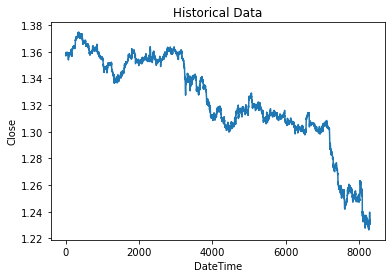

<Figure size 1152x648 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

plt.plot(df_history[('bid', 'Close')])

plt.xlabel("DateTime")
plt.ylabel("Close")
plt.title("Historical Data")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [11]:
df_history = df_history.sort_values(by=['DateTime'], ascending=False)
df_history

DateTime      bid                                 ask  \
                             Open     High      Low    Close     Open   
8300 2022-05-10 00:00:00  1.23333  1.23399  1.23250  1.23362  1.23348   
8299 2022-05-09 23:45:00  1.23227  1.23413  1.23214  1.23336  1.23236   
8298 2022-05-09 23:30:00  1.23093  1.23254  1.23064  1.23228  1.23102   
8297 2022-05-09 23:15:00  1.23144  1.23174  1.23072  1.23090  1.23153   
8296 2022-05-09 23:00:00  1.23053  1.23216  1.23042  1.23145  1.23062   
...                  ...      ...      ...      ...      ...      ...   
4    2022-01-10 05:00:00  1.35685  1.35810  1.35660  1.35806  1.35895   
3    2022-01-10 04:45:00  1.35700  1.35737  1.35669  1.35687  1.35910   
2    2022-01-10 04:30:00  1.35698  1.35719  1.35687  1.35698  1.35908   
1    2022-01-10 04:15:00  1.35699  1.35721  1.35691  1.35699  1.35909   
0    2022-01-10 04:00:00  1.35714  1.35816  1.35682  1.35719  1.35924   

                                last                        
         High      Low    Close Open High Low Close Volume  
8300  1.23411  1.23265  1.23371  NaN  NaN NaN   NaN   1684  
8299  1.23422  1.23223  1.23345  NaN  NaN NaN   NaN   2735  
8298  1.23263  1.23073  1.23237  NaN  NaN NaN   NaN   2862  
8297  1.23186  1.23083  1.23099  NaN  NaN NaN   NaN   1955  
8296  1.23225  1.23051  1.23154  NaN  NaN NaN   NaN   2625  
...       ...      ...      ...  ...  ...  ..   ...    ...  
4     1.35946  1.35795  1.35916  NaN  NaN NaN   NaN    256  
3     1.35947  1.35879  1.35897  NaN  NaN NaN   NaN     78  
2     1.35929  1.35897  1.35908  NaN  NaN NaN   NaN     31  
1     1.35931  1.35901  1.35909  NaN  NaN NaN   NaN     26  
0     1.36003  1.35892  1.35929  NaN  NaN NaN   NaN     58  

[8301 rows x 14 columns]

In [12]:
df_history.describe()

bid                                                 ask  \
              Open         High          Low        Close         Open   
count  8301.000000  8301.000000  8301.000000  8301.000000  8301.000000   
mean      1.322740     1.323203     1.322262     1.322727     1.322938   
std       0.034692     0.034629     0.034761     0.034706     0.034689   
min       1.226410     1.227380     1.226040     1.226420     1.226500   
25%       1.305680     1.306130     1.305190     1.305670     1.306080   
50%       1.319240     1.319650     1.318620     1.319220     1.319370   
75%       1.354220     1.354540     1.353830     1.354210     1.354400   
max       1.374610     1.374850     1.373980     1.374620     1.374700   

                                             last                               
              High          Low        Close Open High  Low Close       Volume  
count  8301.000000  8301.000000  8301.000000  0.0  0.0  0.0   0.0  8301.000000  
mean      1.323400     1.322458     1.322922  NaN  NaN  NaN   NaN  1791.434887  
std       0.034624     0.034757     0.034702  NaN  NaN  NaN   NaN   922.906580  
min       1.227470     1.226130     1.226510  NaN  NaN  NaN   NaN     2.000000  
25%       1.306590     1.305550     1.306090  NaN  NaN  NaN   NaN  1129.000000  
50%       1.319850     1.318770     1.319360  NaN  NaN  NaN   NaN  1678.000000  
75%       1.354770     1.354040     1.354390  NaN  NaN  NaN   NaN  2282.000000  
max       1.374940     1.374070     1.374710  NaN  NaN  NaN   NaN  7683.000000

In [13]:
# Data local backup

if not LOCAL_READ:
    df_history.to_excel(f'''../data/{TARGET_EPIC}-{RESOLUTION}_{date.today()}.xlsx''', index=True)

# Data Transformation

### Refer to the Notebook (Data_Transformer.ipynb) for the detailed process

In [14]:
param = df_history
mode = "trainer"
%run ./utils/Data_Transformer.ipynb

Note: you may need to restart the kernel to use updated packages.


In [15]:
df_min_max_scaled

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
8299,0.039474,0.045772,0.041230,0.046761,0.355813,0.296355,0.012150,0.063209,0.131183,0.157294,0.120442,1.0
8298,0.030499,0.034922,0.031159,0.039474,0.372347,0.253566,0.027103,0.021070,0.175269,0.148329,0.148066,1.0
8297,0.033941,0.029633,0.031767,0.030229,0.254264,0.049128,0.066355,0.068882,0.018280,0.077425,0.059669,0.0
8296,0.027800,0.032413,0.029672,0.033941,0.341492,0.258320,0.010280,0.057536,0.110753,0.136104,0.101657,1.0
8295,0.030364,0.024886,0.026969,0.027800,0.399557,0.022187,0.083178,0.041329,0.055914,0.078240,0.040884,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.886910,0.890690,0.886786,0.891633,0.033069,0.139461,0.057944,0.013776,0.143011,0.116544,0.078453,1.0
3,0.887922,0.888248,0.889895,0.886977,0.009895,0.058637,0.028972,0.040519,0.019355,0.049715,0.014365,0.0
2,0.887787,0.887028,0.891112,0.887719,0.003776,0.033281,0.010280,0.017018,0.011828,0.020375,0.000000,0.5
1,0.887854,0.887163,0.891382,0.887787,0.003125,0.034865,0.007477,0.017828,0.008602,0.018745,0.000000,0.5


In [16]:
df_history2

DateTime      bid                                 ask  \
                             Open     High      Low    Close     Open   
8299 2022-05-09 23:45:00  1.23227  1.23413  1.23214  1.23336  1.23236   
8298 2022-05-09 23:30:00  1.23093  1.23254  1.23064  1.23228  1.23102   
8297 2022-05-09 23:15:00  1.23144  1.23174  1.23072  1.23090  1.23153   
8296 2022-05-09 23:00:00  1.23053  1.23216  1.23042  1.23145  1.23062   
8295 2022-05-09 22:45:00  1.23091  1.23105  1.23002  1.23054  1.23100   
...                  ...      ...      ...      ...      ...      ...   
4    2022-01-10 05:00:00  1.35685  1.35810  1.35660  1.35806  1.35895   
3    2022-01-10 04:45:00  1.35700  1.35737  1.35669  1.35687  1.35910   
2    2022-01-10 04:30:00  1.35698  1.35719  1.35687  1.35698  1.35908   
1    2022-01-10 04:15:00  1.35699  1.35721  1.35691  1.35699  1.35909   
0    2022-01-10 04:00:00  1.35714  1.35816  1.35682  1.35719  1.35924   

                                  last      mid                             
         High      Low    Close Volume     Open     High      Low    Close  
8299  1.23422  1.23223  1.23345   2735  1.23231  1.23418  1.23218  1.23340  
8298  1.23263  1.23073  1.23237   2862  1.23098  1.23258  1.23069  1.23232  
8297  1.23186  1.23083  1.23099   1955  1.23149  1.23180  1.23078  1.23095  
8296  1.23225  1.23051  1.23154   2625  1.23058  1.23221  1.23047  1.23150  
8295  1.23116  1.23013  1.23063   3071  1.23096  1.23110  1.23007  1.23059  
...       ...      ...      ...    ...      ...      ...      ...      ...  
4     1.35946  1.35795  1.35916    256  1.35790  1.35878  1.35728  1.35861  
3     1.35947  1.35879  1.35897     78  1.35805  1.35842  1.35774  1.35792  
2     1.35929  1.35897  1.35908     31  1.35803  1.35824  1.35792  1.35803  
1     1.35931  1.35901  1.35909     26  1.35804  1.35826  1.35796  1.35804  
0     1.36003  1.35892  1.35929     58  1.35819  1.35910  1.35787  1.35824  

[8300 rows x 14 columns]

# Build the Predictive Models

In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
df = df_min_max_scaled.copy()

In [19]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [20]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                                   enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [21]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [22]:
w2 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['Close'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

In [23]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
        
    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

WindowGenerator.split_window = split_window

In [24]:
import tensorflow as tf

In [25]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 8, 12)
Inputs shape: (3, 7, 12)
Labels shape: (3, 1, 1)


In [26]:
w2.example = example_inputs, example_labels

In [27]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()
        
    plt.xlabel('DateTime')

WindowGenerator.plot = plot

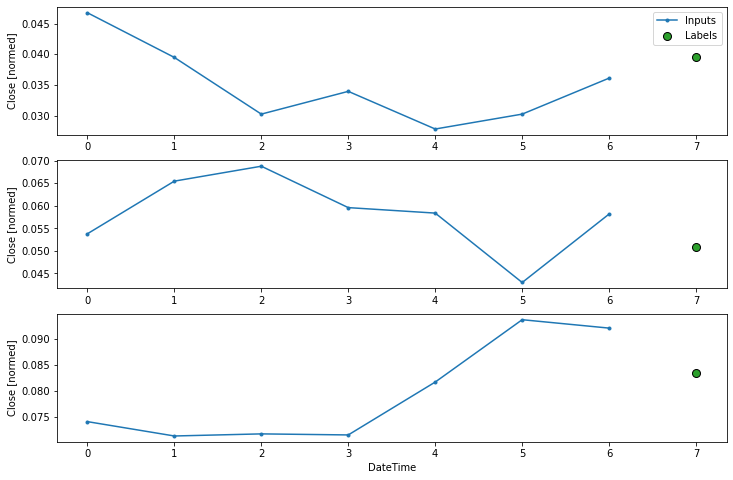

In [28]:
w2.plot()

In [29]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

In [30]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [31]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 7, 12), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [32]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 7, 12)
Labels shape (batch, time, features): (32, 1, 1)


### Single-Step Models

In [33]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Close'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Close']

In [34]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 12)
Labels shape (batch, time, features): (32, 1, 1)


In [35]:
models = {}

### Baseline

In [36]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [37]:
baseline = Baseline(label_index=column_indices['Close'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

52/52 [==============================] - 0s 1ms/step - loss: 1.6819e-05 - mean_absolute_error: 0.0028


In [102]:
wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1,
    label_columns=['Close'])

wide_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['Close']

In [103]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 7, 12)
Output shape: (32, 7, 1)


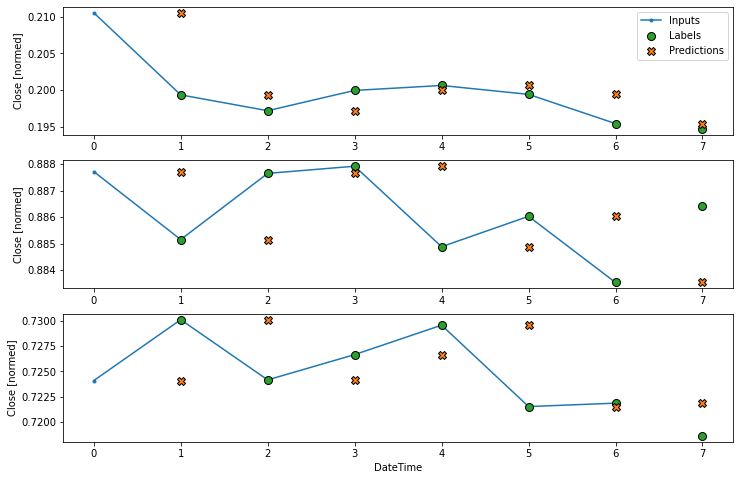

In [104]:
wide_window.plot(baseline)

In [105]:
models['baseline'] = {'data':baseline}

### Linear

In [106]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1) # Linear
])

In [107]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 12)
Output shape: (32, 1, 1)


In [108]:
MAX_EPOCHS = 1000000

def compile_and_fit(model, window, patience=3):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [109]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/1000000
182/182 [==============================] - 1s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.1387 - val_loss: 0.0226 - val_mean_absolute_error: 0.1351
Epoch 2/1000000
182/182 [==============================] - 1s 3ms/step - loss: 0.0077 - mean_absolute_error: 0.0649 - val_loss: 0.0049 - val_mean_absolute_error: 0.0631
Epoch 3/1000000
182/182 [==============================] - 1s 3ms/step - loss: 0.0020 - mean_absolute_error: 0.0317 - val_loss: 0.0012 - val_mean_absolute_error: 0.0297
Epoch 4/1000000
182/182 [==============================] - 1s 3ms/step - loss: 5.7166e-04 - mean_absolute_error: 0.0165 - val_loss: 3.1640e-04 - val_mean_absolute_error: 0.0139
Epoch 5/1000000
182/182 [==============================] - 1s 3ms/step - loss: 2.4842e-04 - mean_absolute_error: 0.0109 - val_loss: 1.4337e-04 - val_mean_absolute_error: 0.0083
Epoch 6/1000000
182/182 [==============================] - 1s 3ms/step - loss: 1.5655e-04 - mean_absolute_error: 0.0087 - val_loss: 9.1013e

In [110]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 7, 12)
Output shape: (32, 7, 1)


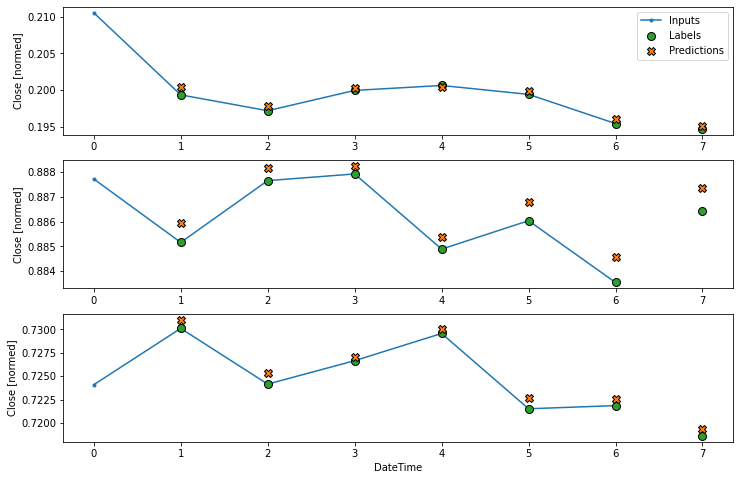

In [111]:
wide_window.plot(linear)

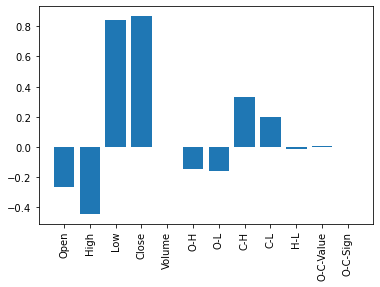

In [112]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [113]:
models['linear'] = {'data':linear}

### Dense

In [114]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3072, activation='relu'),
    tf.keras.layers.Dense(units=1536, activation='relu'),
    tf.keras.layers.Dense(units=768, activation='relu'),
    tf.keras.layers.Dense(units=348, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=96, activation='relu'),
    tf.keras.layers.Dense(units=48, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/1000000
182/182 [==============================] - 3s 11ms/step - loss: 0.0092 - mean_absolute_error: 0.0332 - val_loss: 1.5982e-06 - val_mean_absolute_error: 8.4061e-04
Epoch 2/1000000
182/182 [==============================] - 2s 10ms/step - loss: 6.1684e-06 - mean_absolute_error: 0.0014 - val_loss: 7.4702e-06 - val_mean_absolute_error: 0.0025
Epoch 3/1000000
182/182 [==============================] - 2s 10ms/step - loss: 3.5903e-06 - mean_absolute_error: 0.0011 - val_loss: 5.9775e-07 - val_mean_absolute_error: 4.9006e-04
Epoch 4/1000000
182/182 [==============================] - 2s 9ms/step - loss: 3.5303e-06 - mean_absolute_error: 0.0011 - val_loss: 4.8368e-06 - val_mean_absolute_error: 0.0021
Epoch 5/1000000
182/182 [==============================] - 2s 9ms/step - loss: 4.2645e-06 - mean_absolute_error: 0.0013 - val_loss: 1.2021e-06 - val_mean_absolute_error: 8.4048e-04
Epoch 6/1000000
52/52 [==============================] - 0s 5ms/step - loss: 6.3818e-07 - mean_absolute_

In [115]:
models['dense'] = {'data':dense}

### Multi-Step Dense

In [116]:
CONV_WIDTH = 7
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Close'])

conv_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

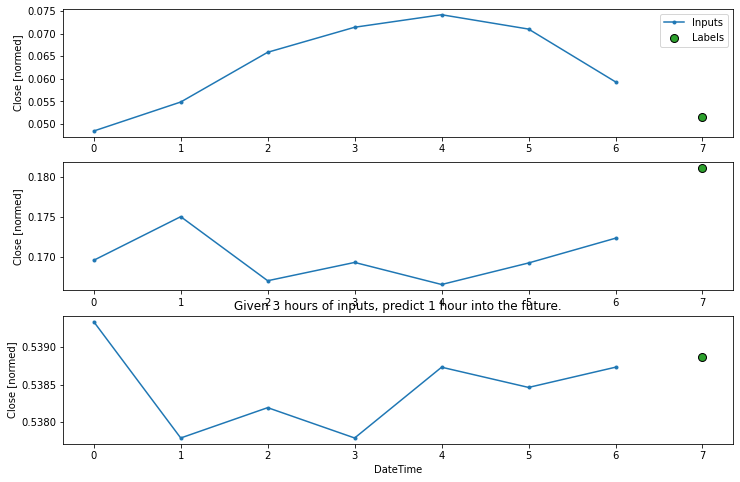

In [117]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [118]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3072, activation='relu'),
    tf.keras.layers.Dense(units=1536, activation='relu'),
    tf.keras.layers.Dense(units=768, activation='relu'),
    tf.keras.layers.Dense(units=348, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=96, activation='relu'),
    tf.keras.layers.Dense(units=48, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [119]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 7, 12)
Output shape: (32, 1, 1)


In [120]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/1000000
182/182 [==============================] - 2s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0299 - val_loss: 9.8586e-05 - val_mean_absolute_error: 0.0095
Epoch 2/1000000
182/182 [==============================] - 1s 5ms/step - loss: 9.7100e-05 - mean_absolute_error: 0.0071 - val_loss: 2.0837e-05 - val_mean_absolute_error: 0.0039
Epoch 3/1000000
182/182 [==============================] - 1s 5ms/step - loss: 6.9207e-05 - mean_absolute_error: 0.0063 - val_loss: 1.9764e-04 - val_mean_absolute_error: 0.0138
Epoch 4/1000000
182/182 [==============================] - 1s 5ms/step - loss: 9.5357e-05 - mean_absolute_error: 0.0068 - val_loss: 7.1385e-06 - val_mean_absolute_error: 0.0022
Epoch 5/1000000
182/182 [==============================] - 1s 5ms/step - loss: 6.3977e-05 - mean_absolute_error: 0.0056 - val_loss: 0.0011 - val_mean_absolute_error: 0.0335
Epoch 6/1000000
182/182 [==============================] - 1s 5ms/step - loss: 6.8176e-04 - mean_absolute_error: 0.0158 - v

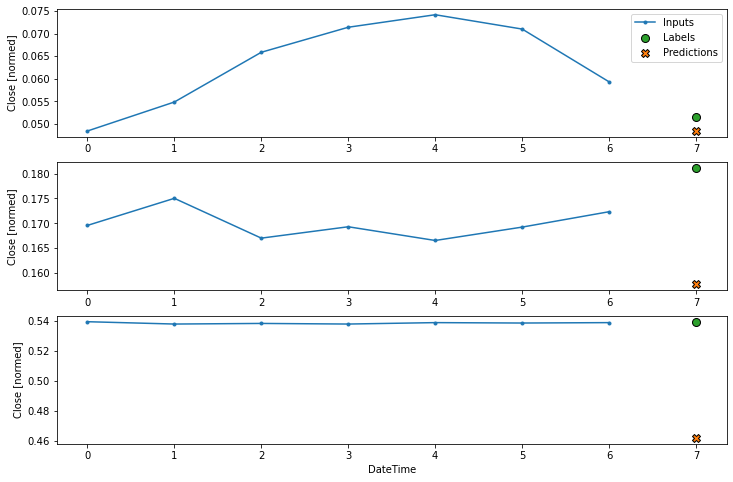

In [121]:
conv_window.plot(multi_step_dense)

In [122]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 7, 12)
Output shape: (32, 1, 1)


In [123]:
models['multi_step_dense'] = {'data':multi_step_dense}

### Convolution Neural Network

In [124]:
# conv_model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=32,
#                            kernel_size=(CONV_WIDTH,),
#                            activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=1),
# ])

In [125]:
# print("Conv model on `conv_window`")
# print('Input shape:', conv_window.example[0].shape)
# print('Output shape:', conv_model(conv_window.example[0]).shape)

In [126]:
# history = compile_and_fit(conv_model, conv_window)

# # IPython.display.clear_output()
# val_performance['Conv'] = conv_model.evaluate(conv_window.val)
# performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [127]:
# print("Wide window")
# print('Input shape:', wide_window.example[0].shape)
# print('Labels shape:', wide_window.example[1].shape)
# print('Output shape:', conv_model(wide_window.example[0]).shape)

In [128]:
# LABEL_WIDTH = 24
# INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
# wide_conv_window = WindowGenerator(
#     input_width=INPUT_WIDTH,
#     label_width=LABEL_WIDTH,
#     shift=1,
#     label_columns=['Close'])

# wide_conv_window

In [129]:
# print("Wide conv window")
# print('Input shape:', wide_conv_window.example[0].shape)
# print('Labels shape:', wide_conv_window.example[1].shape)
# print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

In [130]:
# wide_conv_window.plot(conv_model)

In [131]:
# models['conv_model'] = {'data':conv_model}

### Recurrent Neural Network

In [132]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(3072, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [133]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 7, 12)
Output shape: (32, 7, 1)


In [134]:
history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/1000000
182/182 [==============================] - 5s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0529 - val_loss: 3.8403e-04 - val_mean_absolute_error: 0.0113
Epoch 2/1000000
182/182 [==============================] - 3s 15ms/step - loss: 2.1396e-04 - mean_absolute_error: 0.0067 - val_loss: 9.9824e-05 - val_mean_absolute_error: 0.0058
Epoch 3/1000000
182/182 [==============================] - 3s 17ms/step - loss: 7.0481e-05 - mean_absolute_error: 0.0040 - val_loss: 2.2136e-05 - val_mean_absolute_error: 0.0031
Epoch 4/1000000
182/182 [==============================] - 3s 15ms/step - loss: 2.3310e-05 - mean_absolute_error: 0.0025 - val_loss: 8.2197e-06 - val_mean_absolute_error: 0.0020
Epoch 5/1000000
182/182 [==============================] - 3s 15ms/step - loss: 9.3841e-06 - mean_absolute_error: 0.0017 - val_loss: 3.9126e-06 - val_mean_absolute_error: 0.0014
Epoch 6/1000000
182/182 [==============================] - 3s 15ms/step - loss: 5.4422e-06 - mean_absolute_error: 

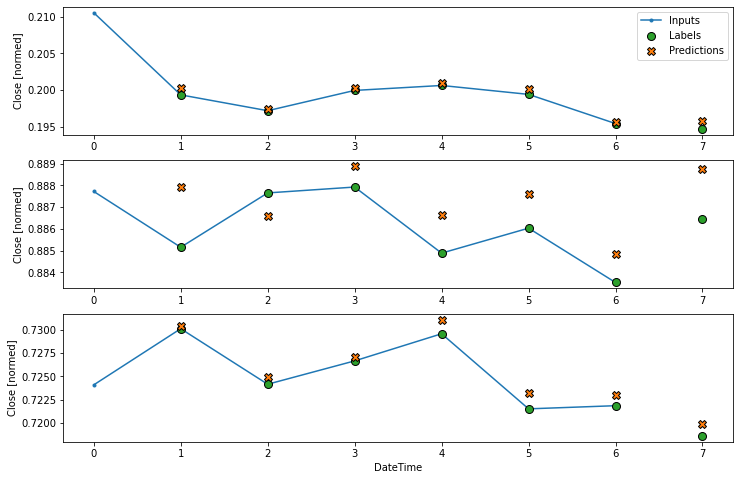

In [135]:
wide_window.plot(lstm_model)

In [136]:
models['lstm_model'] = {'data':lstm_model}

### Performance

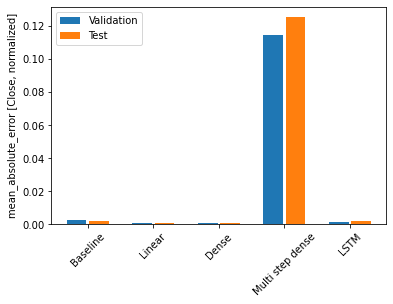

In [137]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [138]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0022
Linear      : 0.0008
Dense       : 0.0008
Multi step dense: 0.1254
LSTM        : 0.0017


### Save Model and Parameters for UnNormalization

In [139]:
for model in models:
    models[model]['data'].save(f'''../models/{model}''')

In [143]:
import json

unNormalizeParams2 = unNormalizeParams.copy()

# unNormalizeParams2['DateTime']['min'] = unNormalizeParams2['DateTime']['min'].strftime("%Y-%m-%d %H:%M:%S")
# unNormalizeParams2['DateTime']['max'] = unNormalizeParams2['DateTime']['max'].strftime("%Y-%m-%d %H:%M:%S")

json_object = json.dumps(unNormalizeParams2, indent = 4)

with open('../models/unnormalized_parameters.json', 'w') as outfile:
    outfile.write(json_object)